In [13]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

import pickle

from analyseModel import results
from hyperparameterTuning import hyperparamTraining as hpt 

In [14]:
file = open('../../data/ML_models/model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [15]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
columns = data['x_feature']

In [16]:
rf_model = pickle.load(open('../../data/ML_models/rfModel.pkl', 'rb'))
svc_model = pickle.load(open('../../data/ML_models/svcModel.pkl', 'rb'))
xgb_model = pickle.load(open('../../data/ML_models/xgbModel.pkl', 'rb'))

In [17]:
estimators = [
    ('rf', rf_model),
    ('svr', svc_model), 
    ('xgb', xgb_model)
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.759403832505323

classification report :
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1036
           1       0.53      0.71      0.61       373

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



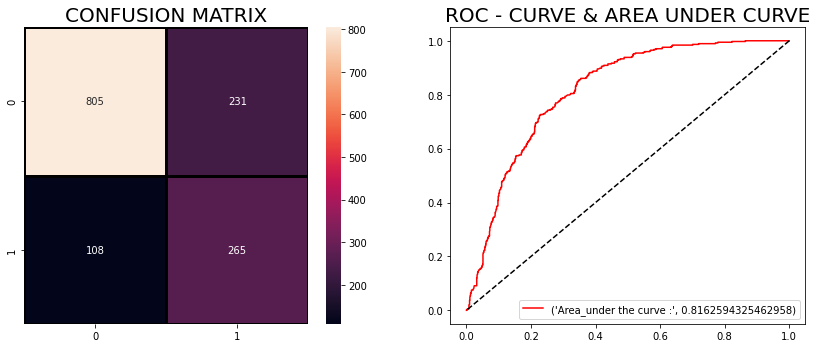

In [18]:
results(clf, x_train, y_train, x_test, y_test, "feat", columns, f_imp = False)

In [19]:
file = open('../../data/ML_models/stackedModel.pkl', 'wb')
pickle.dump(clf, file)